# Customer Service Request Anlaysis_Project_1

In [1]:
#importing the relevent libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1.1 Import the dataset
raw_data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False)

In [3]:
# making the copy of extracted data and using it further
df = raw_data.copy()

In [4]:
# 1.2 Visualizing the data
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
# 1.3 Columns of the dataframe
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
# 1.4 Shape of the data
df.shape

(364558, 53)

In [7]:
# get total information of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [8]:
# Checking the null values in a datframe. Following code will give column which are having zero null also, by stating na as 0.
df.isna().sum()


Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [9]:
# 1.5 Get the only variables/ column names which are having any null values.
var_with_nullvalues = df.columns[df.isna().any()].tolist()
var_with_nullvalues

['Closed Date',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'City',
 'Landmark',
 'Facility Type',
 'Due Date',
 'Resolution Action Updated Date',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'School Region',
 'School Code',
 'School Zip',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name',
 'Latitude',
 'Longitude',
 'Location']

In [10]:
# get the columns/variables in which null value exist & their count
null_value_details = df.isna().sum()[df.isna().sum()>0] 
null_value_details

Closed Date                         2381
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Due Date                               3
Resolution Action Updated Date      2402
X Coordinate (State Plane)          4030
Y Coordinate (State Plane)          4030
School Region                          1
School Code                            1
School Zip                             1
School or Citywide Complaint      364558
Vehicle Type                      364558
Taxi Company Borough              364558
Taxi Pick Up Loc

# Task 2: Perform basic data exploratory analysis:

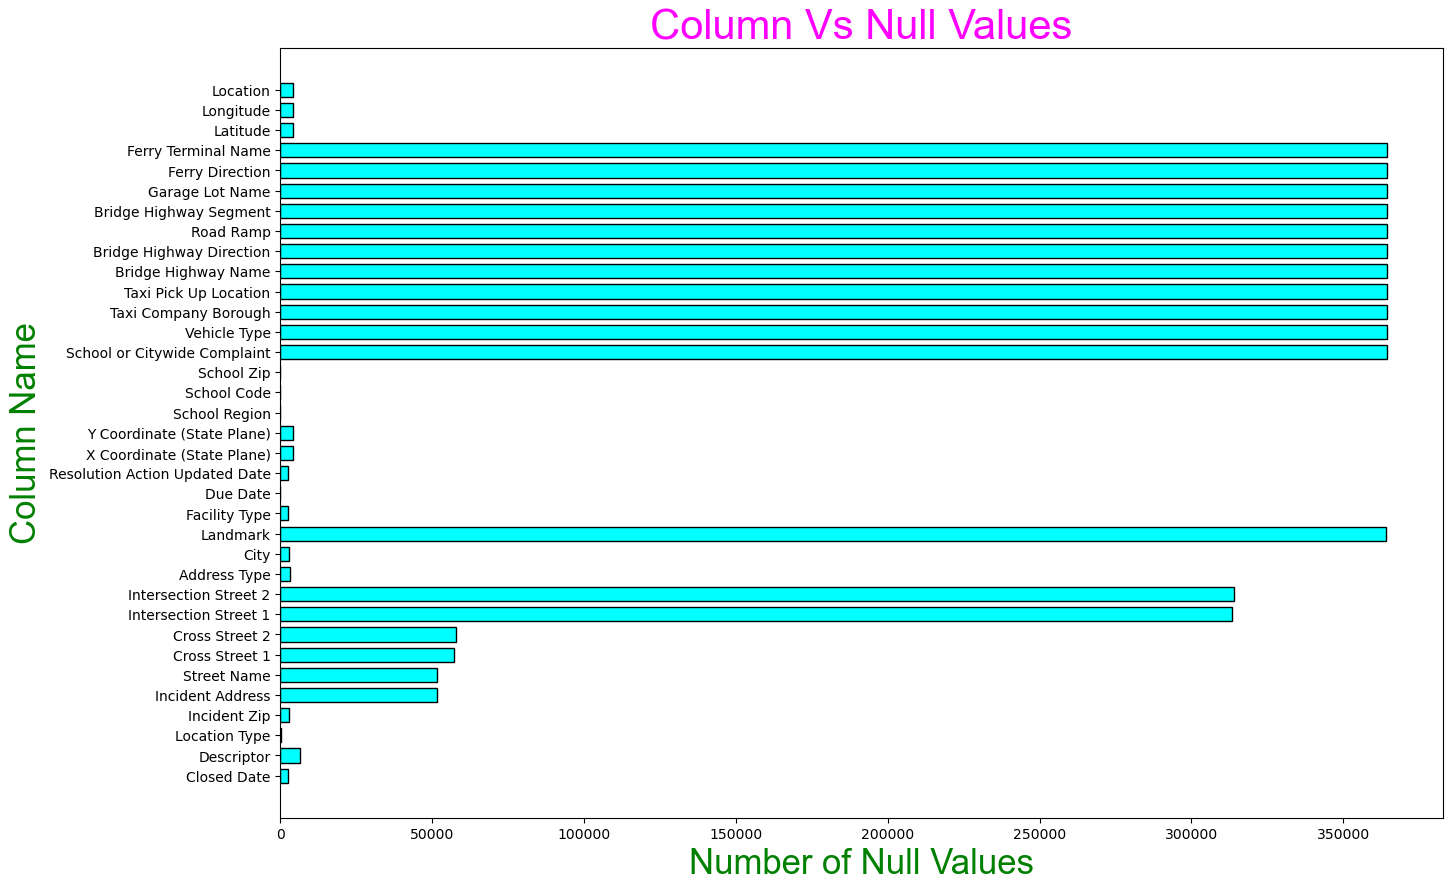

In [11]:
# 2.1 Draw a frequency plot to show the number of null values in each column of the DataFrame
plt.figure(figsize = (15,10))
plt.barh(y = null_value_details.index, width= null_value_details.values,height= 0.7,color = 'cyan',ec = 'black')
plt.xlabel("Number of Null Values",fontdict={'font':'arial','size':25,'color':'green'})
plt.ylabel("Column Name",fontdict={'font':'arial','size':25,'color':'green'})
plt.title("Column Vs Null Values",fontdict={'font':'arial','size':30,'color':'magenta'})
plt.show()

### 2.2.1Remove the records whose Closed Date values are null

In [12]:
# dropping the entries and saving the changes in new dataframe
df = df.dropna(subset= ['Closed Date'])
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [13]:
# ensuring all NaN records are removed.
df['Closed Date'].isna().sum()

0

In [14]:
# Closed Date Column had 2381 NaN entries,ensuring these many rows/entries are removed
raw_data.shape[0]-df.shape[0]

2381

### 2.3Analyze the date column,and remove entries that have an incorrect timeline

In [15]:
# Converting object datatype of date columns to datetime.
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Created Date']

0        2015-12-31 23:59:45
1        2015-12-31 23:59:44
2        2015-12-31 23:59:29
3        2015-12-31 23:57:46
4        2015-12-31 23:56:58
                 ...        
364553   2015-01-01 00:04:44
364554   2015-01-01 00:04:28
364555   2015-01-01 00:01:30
364556   2015-01-01 00:01:29
364557   2015-01-01 00:00:50
Name: Created Date, Length: 362177, dtype: datetime64[ns]

In [16]:
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Closed Date']

0        2016-01-01 00:55:15
1        2016-01-01 01:26:57
2        2016-01-01 04:51:03
3        2016-01-01 07:43:13
4        2016-01-01 03:24:42
                 ...        
364553   2015-01-01 10:22:31
364554   2015-01-01 02:25:02
364555   2015-01-01 00:20:33
364556   2015-01-01 02:42:22
364557   2015-01-01 02:47:50
Name: Closed Date, Length: 362177, dtype: datetime64[ns]

In [17]:
# Checking for any null vcalues in date columns
df['Closed Date'].isna().sum()

0

In [18]:
df['Created Date'].isna().sum()

0

### 2.3.1 Create new column of time elapsed between Closed Date & Created date

In [19]:
df['Time Elapsed']=df['Closed Date']-df['Created Date']

### 2.3.2 Converting date column to seconds

In [20]:
df['Time Elapsed'] = df['Time Elapsed'].dt.total_seconds()

In [21]:
df['Time Elapsed']

0          3330.0
1          5233.0
2         17494.0
3         27927.0
4         12464.0
           ...   
364553    37067.0
364554     8434.0
364555     1143.0
364556     9653.0
364557    10020.0
Name: Time Elapsed, Length: 362177, dtype: float64

### 2.3.3 View the descriptive statstics for newly created column

In [22]:
df['Time Elapsed'].describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Time Elapsed, dtype: float64

### 2.3.4Check the number of null values in the Complaint_Type and City columns

In [23]:
df['Complaint Type'].isna().sum()

0

In [24]:
df['City'].isna().sum()

674

### 2.3.5 Impute the NA value of City with Unknown City

In [25]:
df['City'].fillna('Unknown City',inplace=True)

In [26]:
# Ensuring all NA values are filled
df["City"].isna().sum()

0

### 2.3.6 Draw a frequency plot for the complaints in each city

In [27]:
citywise_complaints = df['City'].value_counts()

In [28]:
citywise_complaints

BROOKLYN               118849
NEW YORK                77289
BRONX                   49166
STATEN ISLAND           15335
JAMAICA                  8930
ASTORIA                  7991
FLUSHING                 7486
RIDGEWOOD                6391
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3557
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3117
WOODHAVEN                3102
LONG ISLAND CITY         3027
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2333
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2105
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT ALBA

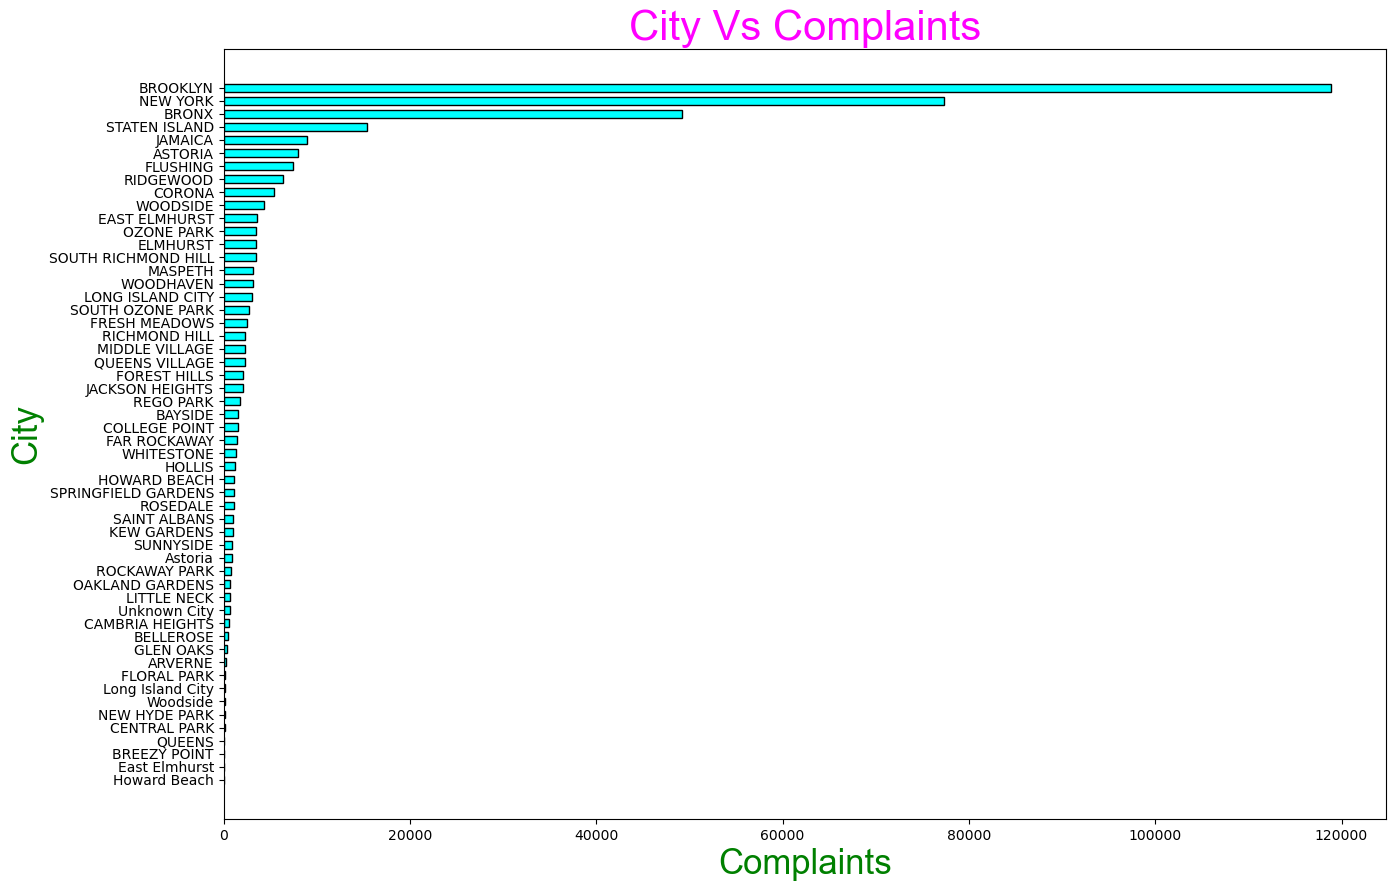

In [29]:
plt.figure(figsize = (15,10))
plt.barh(y = citywise_complaints[::-1].index, width= citywise_complaints[::-1].values,height= 0.6,color = 'cyan',ec = 'black')
plt.xlabel("Complaints",fontdict={'font':'arial','size':25,'color':'green'})
plt.ylabel("City",fontdict={'font':'arial','size':25,'color':'green'})
plt.title("City Vs Complaints",fontdict={'font':'arial','size':30,'color':'magenta'})
plt.show()

### 2.3.7 Create a scatter and hexbin plot of the concentration of complaints across Brooklyn

In [30]:
df_Brooklyn = df[df['City']== 'BROOKLYN']
df_Brooklyn.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

(-74.05061403028367, -73.84647934348564, 40.561126853754885, 40.78979838623255)

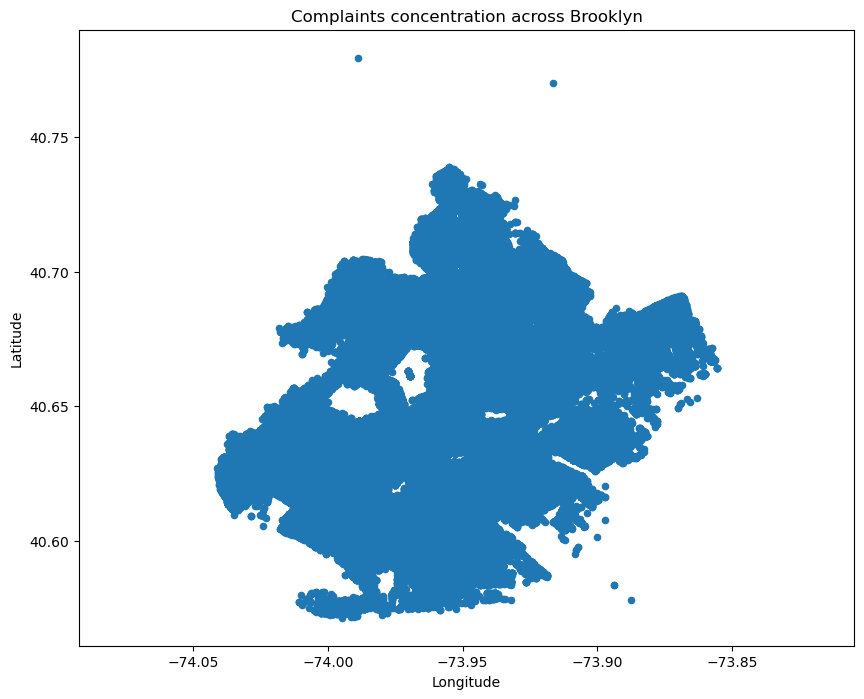

In [31]:
df_Brooklyn.plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),title = 'Complaints concentration across Brooklyn').axis('equal')

(-74.05061403048781, -73.8464793432815, 40.561126853754885, 40.78979838623255)

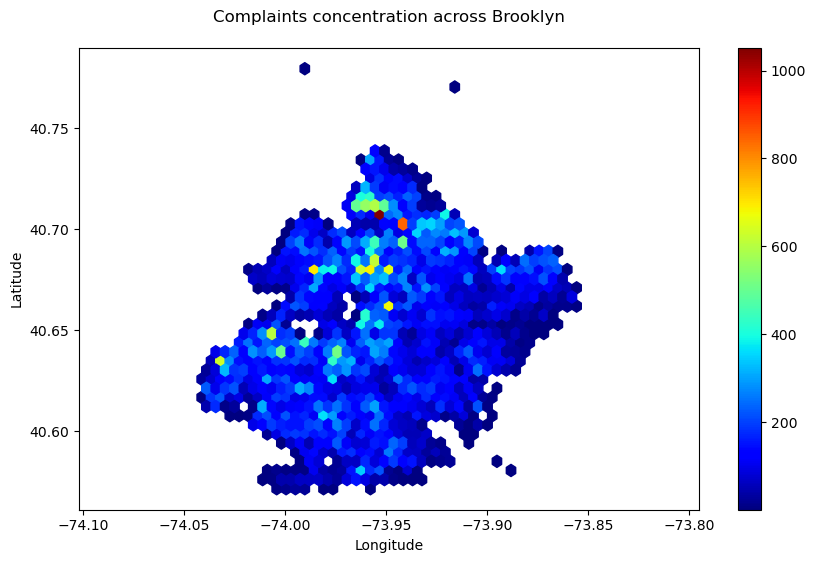

In [32]:
df_Brooklyn.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across Brooklyn\n', figsize=(10,6)).axis('equal')

In [33]:
df['Complaint Type'].value_counts()

Blocked Driveway             100624
Illegal Parking               91716
Noise - Street/Sidewalk       51139
Noise - Commercial            43751
Derelict Vehicle              21518
Noise - Vehicle               19301
Animal Abuse                  10530
Traffic                        5196
Homeless Encampment            4879
Vending                        4185
Noise - Park                   4089
Drinking                       1404
Noise - House of Worship       1068
Posting Advertisement           679
Urinating in Public             641
Bike/Roller/Skate Chronic       475
Panhandling                     325
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Animal in a Park                  1
Name: Complaint Type, dtype: int64

### 3. Find major types of complaints:

<AxesSubplot:>

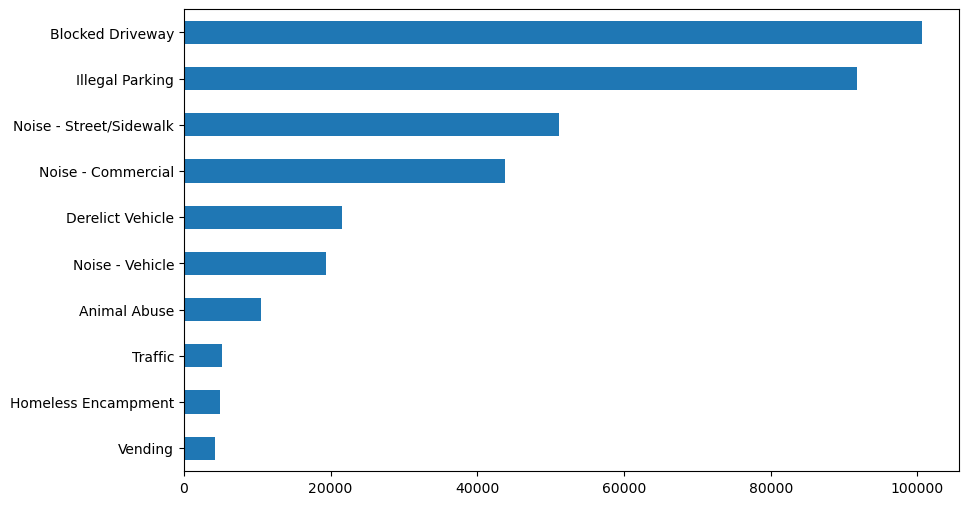

In [34]:
# most common complaints
df['Complaint Type'].value_counts().head(10)[::-1].plot(kind = 'barh',figsize = (10,6))

<AxesSubplot:>

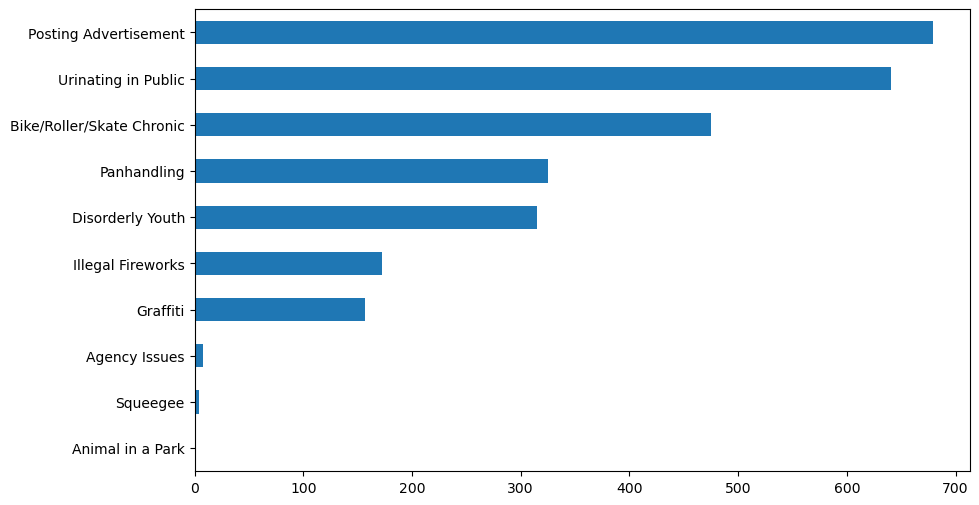

In [35]:
# least frequent complaints
df['Complaint Type'].value_counts().tail(10)[::-1].plot(kind = 'barh',figsize = (10,6))

In [36]:
# Find the complaint types
df['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Agency Issues', 'Squeegee', 'Animal in a Park'], dtype=object)

### 3.1 Plot a bar graph to show the types of complaint

In [37]:
complaint_type_with_count = df['Complaint Type'].value_counts()

In [38]:
(complaint_type_with_count)

Blocked Driveway             100624
Illegal Parking               91716
Noise - Street/Sidewalk       51139
Noise - Commercial            43751
Derelict Vehicle              21518
Noise - Vehicle               19301
Animal Abuse                  10530
Traffic                        5196
Homeless Encampment            4879
Vending                        4185
Noise - Park                   4089
Drinking                       1404
Noise - House of Worship       1068
Posting Advertisement           679
Urinating in Public             641
Bike/Roller/Skate Chronic       475
Panhandling                     325
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Animal in a Park                  1
Name: Complaint Type, dtype: int64

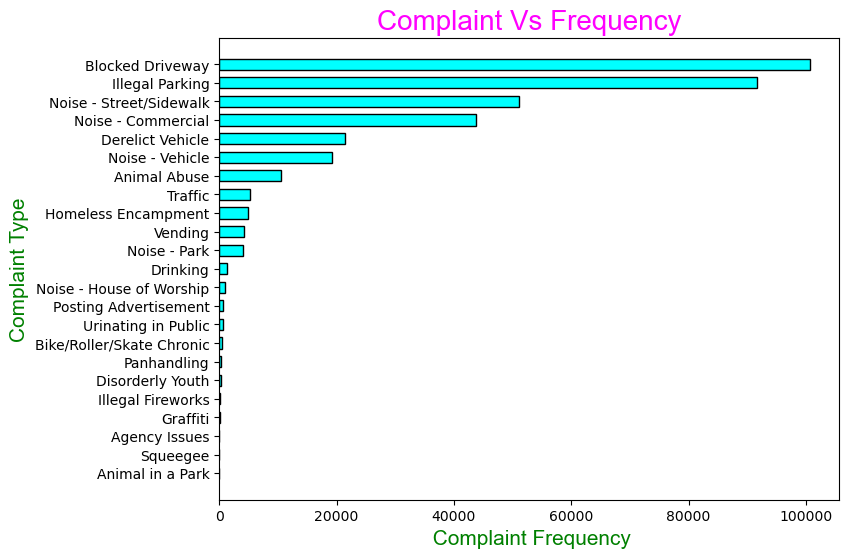

In [39]:
plt.figure(figsize = (8,6))
plt.barh(y = complaint_type_with_count[::-1].index, width= complaint_type_with_count[::-1].values,height= 0.6,color = 'cyan',ec = 'black')
plt.xlabel(" Complaint Frequency",fontdict={'font':'arial','size':15,'color':'green'})
plt.ylabel("Complaint Type",fontdict={'font':'arial','size':15,'color':'green'})
plt.title("Complaint Vs Frequency",fontdict={'font':'arial','size':20,'color':'magenta'})
plt.show()

### 3.2Check the frequency of various types of complaints for New York City

In [40]:
group_city = df.groupby(['City']).get_group('NEW YORK')

In [41]:
NewYork_complaint_freq = group_city[['Complaint Type']].value_counts()
NewYork_complaint_freq

Complaint Type           
Noise - Street/Sidewalk      22245
Noise - Commercial           18686
Illegal Parking              14549
Noise - Vehicle               6294
Homeless Encampment           3060
Blocked Driveway              2705
Vending                       2638
Animal Abuse                  1941
Traffic                       1769
Noise - Park                  1243
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
dtype: int64

### 3.3 Find the top 10 complaint types

In [42]:
# Top 10 complaints across all cities
df['Complaint Type'].value_counts().nlargest(10)

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64

In [43]:
# Top 10 complaint types in New York City
group_city = df.groupby(['City']).get_group('NEW YORK')
group_city[['Complaint Type']].value_counts().nlargest(10)

Complaint Type         
Noise - Street/Sidewalk    22245
Noise - Commercial         18686
Illegal Parking            14549
Noise - Vehicle             6294
Homeless Encampment         3060
Blocked Driveway            2705
Vending                     2638
Animal Abuse                1941
Traffic                     1769
Noise - Park                1243
dtype: int64

### 3.4 Display the various types of complaints in each city


In [44]:
group_citywise_complaints = df.groupby('City')[['Complaint Type']]
group_citywise_complaints.value_counts()

City      Complaint Type         
ARVERNE   Illegal Parking             62
          Blocked Driveway            50
          Animal Abuse                46
          Derelict Vehicle            32
          Noise - Street/Sidewalk     29
                                    ... 
Woodside  Illegal Parking            124
          Blocked Driveway            27
          Derelict Vehicle             8
          Noise - Street/Sidewalk      5
          Noise - Commercial           2
Length: 792, dtype: int64

### 3.5 Create a DataFrame, df_new, which contains cities as columns and complaint types in rows

In [45]:
city = []
complaints = []
for i,j in group_citywise_complaints:
    city.append(i)
    complaints.append(j['Complaint Type'].values)

In [46]:
df_citywise_complainttype = pd.DataFrame(data = complaints, index= city).T

In [47]:
df_citywise_complainttype.head(10)

,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
0,Illegal Parking,Blocked Driveway,Illegal Parking,Blocked Driveway,Derelict Vehicle,Noise - Street/Sidewalk,Blocked Driveway,Illegal Parking,Derelict Vehicle,Noise - Street/Sidewalk,...,Blocked Driveway,Blocked Driveway,Illegal Parking,Posting Advertisement,Blocked Driveway,Illegal Parking,Illegal Parking,Illegal Parking,Blocked Driveway,Illegal Parking
1,Noise - Commercial,Noise - Commercial,Illegal Parking,Derelict Vehicle,Blocked Driveway,Blocked Driveway,Illegal Parking,Blocked Driveway,Derelict Vehicle,Noise - Street/Sidewalk,...,Illegal Parking,Illegal Parking,Blocked Driveway,Posting Advertisement,Blocked Driveway,Illegal Parking,Illegal Parking,Blocked Driveway,Illegal Parking,Illegal Parking
2,Animal Abuse,Noise - Commercial,Noise - Street/Sidewalk,Illegal Parking,Blocked Driveway,Animal Abuse,Blocked Driveway,Illegal Parking,Blocked Driveway,Noise - Street/Sidewalk,...,Derelict Vehicle,Blocked Driveway,Illegal Parking,Posting Advertisement,Noise - Commercial,Blocked Driveway,Blocked Driveway,Blocked Driveway,Derelict Vehicle,Blocked Driveway
3,Animal Abuse,Blocked Driveway,Derelict Vehicle,Illegal Parking,Blocked Driveway,Blocked Driveway,Blocked Driveway,Noise - Commercial,Derelict Vehicle,Noise - Street/Sidewalk,...,Noise - Vehicle,Blocked Driveway,Animal Abuse,Posting Advertisement,Noise - Commercial,Illegal Parking,Illegal Parking,Blocked Driveway,Derelict Vehicle,Illegal Parking
4,Illegal Parking,Blocked Driveway,Illegal Parking,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Noise - Street/Sidewalk,Noise - Commercial,Blocked Driveway,Noise - Street/Sidewalk,...,Blocked Driveway,Blocked Driveway,Illegal Parking,Posting Advertisement,Noise - Street/Sidewalk,Illegal Parking,Derelict Vehicle,Blocked Driveway,Blocked Driveway,Blocked Driveway
5,Illegal Parking,Noise - Vehicle,Blocked Driveway,Derelict Vehicle,Noise - Commercial,Noise - Commercial,Illegal Parking,Noise - Commercial,Blocked Driveway,Noise - Street/Sidewalk,...,Derelict Vehicle,Blocked Driveway,Derelict Vehicle,Noise - Commercial,Illegal Parking,Noise - Commercial,Derelict Vehicle,Blocked Driveway,Illegal Parking,Illegal Parking
6,Blocked Driveway,Blocked Driveway,Blocked Driveway,Derelict Vehicle,Noise - Commercial,Noise - Vehicle,Blocked Driveway,Noise - Commercial,Noise - Commercial,Noise - Street/Sidewalk,...,Illegal Parking,Blocked Driveway,Illegal Parking,Illegal Parking,Noise - Vehicle,Noise - Commercial,Blocked Driveway,Blocked Driveway,Illegal Parking,Illegal Parking
7,Derelict Vehicle,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Blocked Driveway,Blocked Driveway,Blocked Driveway,Noise - Commercial,Noise - Vehicle,Noise - Street/Sidewalk,...,Blocked Driveway,Blocked Driveway,Blocked Driveway,Blocked Driveway,Blocked Driveway,Derelict Vehicle,Illegal Parking,Blocked Driveway,Blocked Driveway,Illegal Parking
8,Derelict Vehicle,Blocked Driveway,Illegal Parking,Illegal Parking,Derelict Vehicle,Noise - Commercial,Illegal Parking,Noise - Commercial,Noise - Commercial,Noise - Street/Sidewalk,...,Illegal Parking,Noise - Commercial,Blocked Driveway,Blocked Driveway,Illegal Parking,Noise - Commercial,Illegal Parking,Blocked Driveway,Derelict Vehicle,Illegal Parking
9,Illegal Parking,Blocked Driveway,Noise - Commercial,Illegal Parking,Illegal Parking,Illegal Parking,Illegal Parking,Blocked Driveway,Blocked Driveway,Noise - Street/Sidewalk,...,Derelict Vehicle,Noise - Commercial,Blocked Driveway,Blocked Driveway,Noise - Vehicle,Noise - Street/Sidewalk,Illegal Parking,Blocked Driveway,Illegal Parking,Illegal Parking


In [48]:
df_citywise_complainttype.T

,0,1,2,3,4,5,6,7,8,9,...,118839,118840,118841,118842,118843,118844,118845,118846,118847,118848
ARVERNE,Illegal Parking,Noise - Commercial,Animal Abuse,Animal Abuse,Illegal Parking,Illegal Parking,Blocked Driveway,Derelict Vehicle,Derelict Vehicle,Illegal Parking,...,None,None,None,None,None,None,None,None,None,None
ASTORIA,Blocked Driveway,Noise - Commercial,Noise - Commercial,Blocked Driveway,Blocked Driveway,Noise - Vehicle,Blocked Driveway,Blocked Driveway,Blocked Driveway,Blocked Driveway,...,None,None,None,None,None,None,None,None,None,None
Astoria,Illegal Parking,Illegal Parking,Noise - Street/Sidewalk,Derelict Vehicle,Illegal Parking,Blocked Driveway,Blocked Driveway,Illegal Parking,Illegal Parking,Noise - Commercial,...,None,None,None,None,None,None,None,None,None,None
BAYSIDE,Blocked Driveway,Derelict Vehicle,Illegal Parking,Illegal Parking,Illegal Parking,Derelict Vehicle,Derelict Vehicle,Noise - Street/Sidewalk,Illegal Parking,Illegal Parking,...,None,None,None,None,None,None,None,None,None,None
BELLEROSE,Derelict Vehicle,Blocked Driveway,Blocked Driveway,Blocked Driveway,Noise - Street/Sidewalk,Noise - Commercial,Noise - Commercial,Blocked Driveway,Derelict Vehicle,Illegal Parking,...,None,None,None,None,None,None,None,None,None,None
BREEZY POINT,Noise - Street/Sidewalk,Blocked Driveway,Animal Abuse,Blocked Driveway,Noise - Commercial,Noise - Commercial,Noise - Vehicle,Blocked Driveway,Noise - Commercial,Illegal Parking,...,None,None,None,None,None,None,None,None,None,None
BRONX,Blocked Driveway,Illegal Parking,Blocked Driveway,Blocked Driveway,Noise - Street/Sidewalk,Illegal Parking,Blocked Driveway,Blocked Driveway,Illegal Parking,Illegal Parking,...,None,None,None,None,None,None,None,None,None,None
BROOKLYN,Illegal Parking,Blocked Driveway,Illegal Parking,Noise - Commercial,Noise - Commercial,Noise - Commercial,Noise - Commercial,Noise - Commercial,Noise - Commercial,Blocked Driveway,...,Blocked Driveway,Blocked Driveway,Blocked Driveway,Noise - Commercial,Noise - Commercial,Blocked Driveway,Blocked Driveway,Noise - Commercial,Blocked Driveway,Blocked Driveway
CAMBRIA HEIGHTS,Derelict Vehicle,Derelict Vehicle,Blocked Driveway,Derelict Vehicle,Blocked Driveway,Blocked Driveway,Noise - Commercial,Noise - Vehicle,Noise - Commercial,Blocked Driveway,...,None,None,None,None,None,None,None,None,None,None
CENTRAL PARK,Noise - Street/Sidewalk,Noise - Street/Sidewalk,Noise - Street/Sidewalk,Noise - Street/Sidewalk,Noise - Street/Sidewalk,Noise - Street/Sidewalk,Noise - Street/Sidewalk,Noise - Street/Sidewalk,Noise - Street/Sidewalk,Noise - Street/Sidewalk,...,None,None,None,None,None,None,None,None,None,None


### 4. Visualize the major types of complaints in each city

<AxesSubplot:ylabel='City,Complaint Type'>

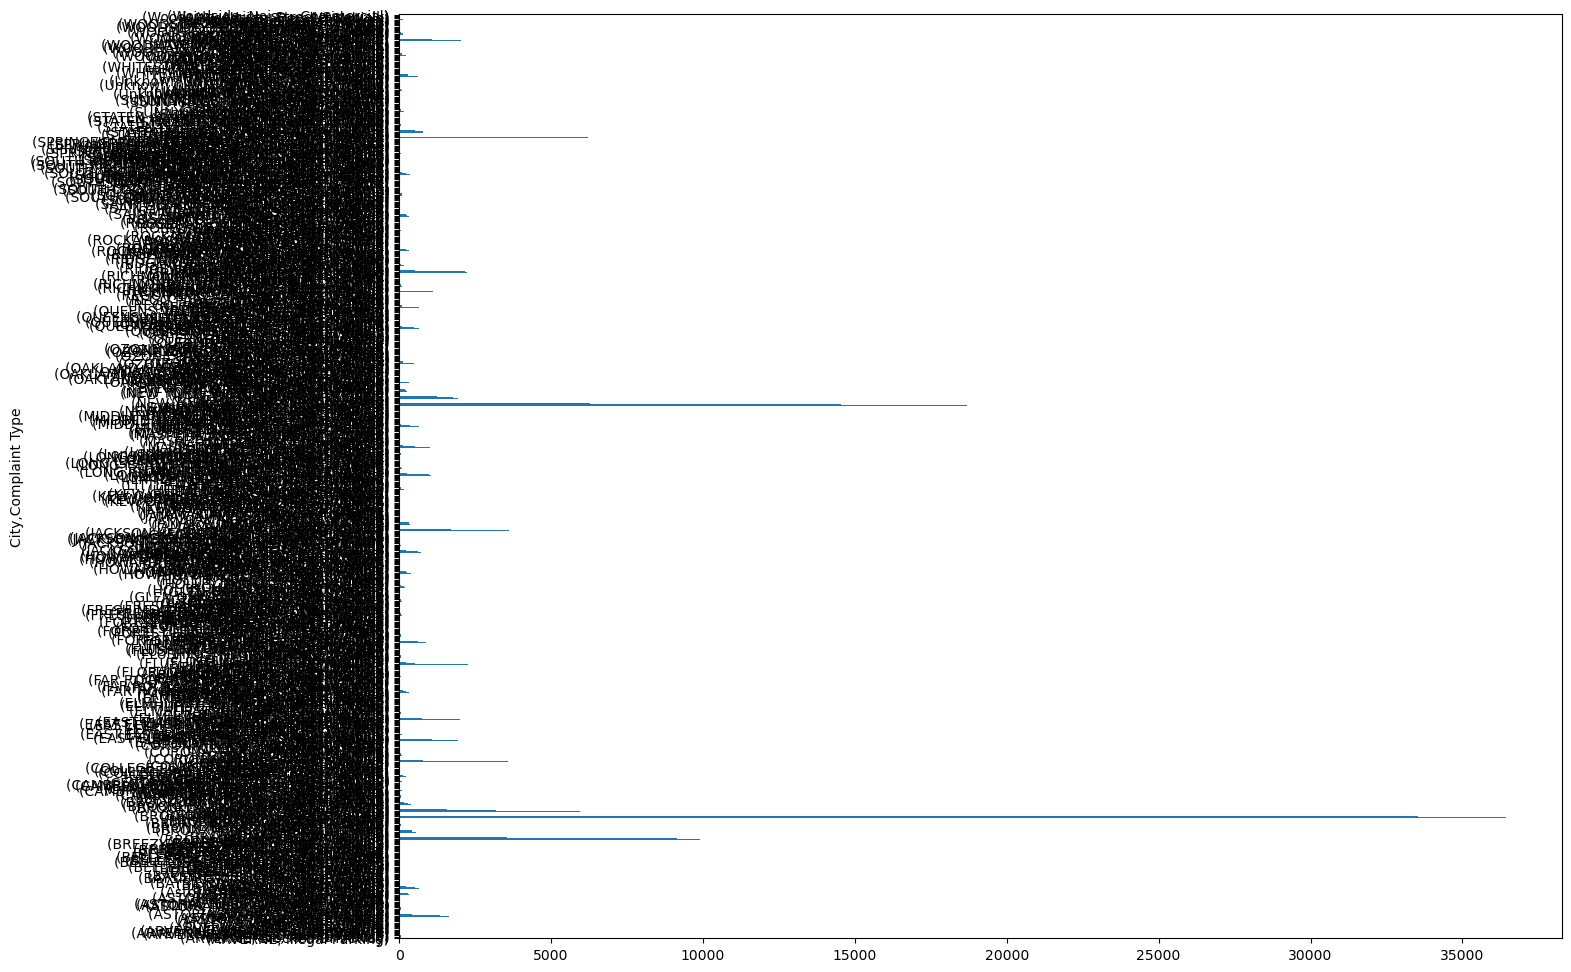

In [49]:
# group the data by city
grouped_df = df.groupby('City')

# find the most common complaint types in each city
complaint_counts = grouped_df['Complaint Type'].value_counts()

# create a bar chart of the most common complaint types in each city
complaint_counts.plot(kind='barh',figsize = (15,12))

### 4.1Draw another chart that shows the types of complaints in each city in a single chart, where different colors show the different types of complaints

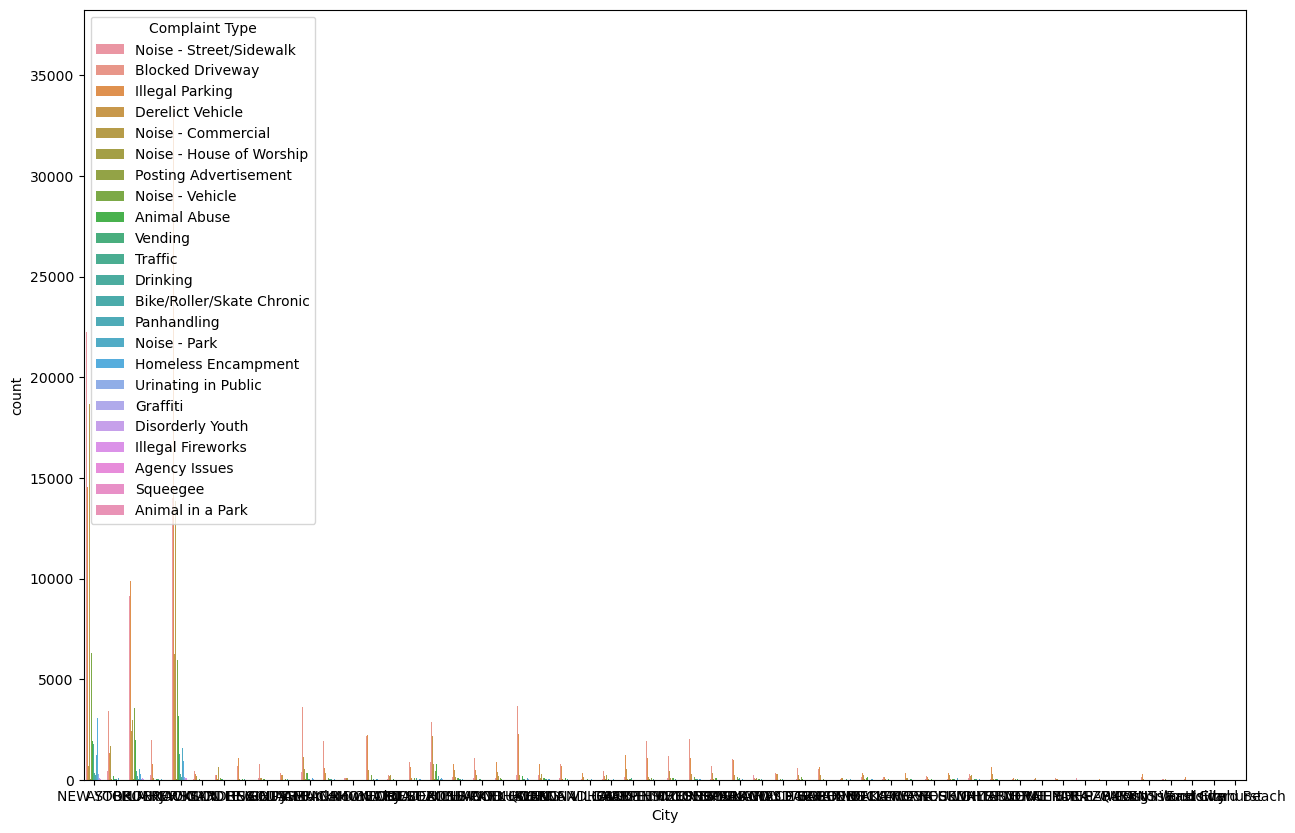

In [50]:
plt.figure(figsize=(15,10))
#sns.set(rc={'figure.figsize':(13,5)})
sns.countplot(x=df['City'],hue=df['Complaint Type'])
plt.show()

### 4.2Sort the complaint types based on the average Request_Closing_Time grouping them for different locations

In [51]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [52]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Time Elapsed
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5233.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17494.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27927.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12464.0


In [53]:
#Calculate multiple statistics on Request_Closing_Time column
df_grouped_Loc_CompT = df.groupby(['Location','Complaint Type']).agg({'Time Elapsed':['mean']}).reset_index()

#sort the data by mean request closing time
sorted_df_grouped = df_grouped_Loc_CompT.sort_values(by=[('Time Elapsed', 'mean')], ascending=True)
# checking the final sorted data
sorted_df_grouped


,Location,Complaint Type,Time Elapsed
,,,mean
101912,"(40.72895633655987, -74.00074325193769)",Noise - Commercial,157.0
56774,"(40.678429539269835, -73.98361397723242)",Noise - Commercial,157.0
132778,"(40.76848580086362, -73.91235250532725)",Noise - Vehicle,163.0
72763,"(40.69371028050496, -73.95499211670034)",Illegal Parking,167.0
130224,"(40.764596652420956, -73.97372678473167)",Noise - Street/Sidewalk,169.0
...,...,...,...
37131,"(40.64465625507198, -73.95663234950166)",Derelict Vehicle,722182.5
37138,"(40.64466438582295, -73.95635848114169)",Derelict Vehicle,804066.0
37319,"(40.64496727639598, -73.95897801142875)",Derelict Vehicle,804132.0


### 5. See whether the average response time across different complaint types is similar (overall)

<AxesSubplot:ylabel='Complaint Type'>

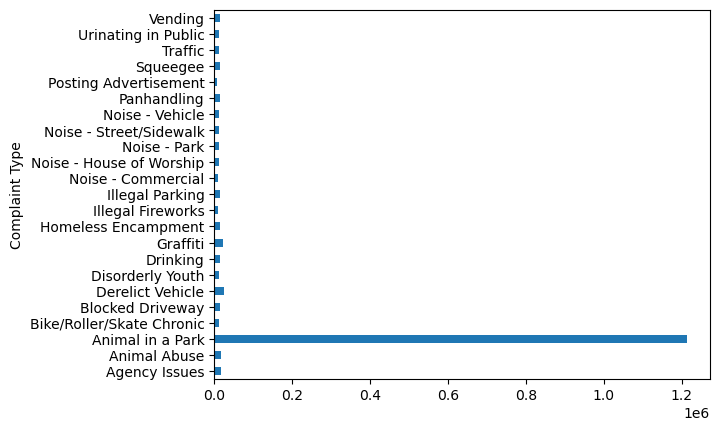

In [54]:
complaintwise_meantime = df.groupby('Complaint Type')['Time Elapsed'].mean()
complaintwise_meantime.plot(kind = 'barh')

From above, we can conclude that the average time of most of the complaint types is nearly same.Only complaint about Animal in a park took much time.